In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
sns.set()

In [4]:
data='./Data'

transactions=pd.read_csv(os.path.join(data,'sales_train_v2.csv'))
items= pd.read_csv(os.path.join(data, 'items.csv'))
item_categories=pd.read_csv(os.path.join(data, 'item_categories.csv'))
shops=pd.read_csv(os.path.join(data, 'shops.csv'))

In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [11]:
transactions.shape

(2935849, 6)

## Task-1

In [12]:
transactions['date']=pd.to_datetime(transactions['date'])

In [47]:
con=((transactions['date'].dt.year==2014) & (transactions['date'].dt.month==9))
sept=transactions.loc[con]

In [49]:
sept['revenue']=sept['item_price']*sept['item_cnt_day']

/home/manmeet/Desktop/PythonProjects/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
sept.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1267571,2014-09-01,12,54,10300,699.0,1.0,699.0
1267595,2014-09-01,12,54,10292,99.0,1.0,99.0
1267605,2014-09-01,12,54,10376,399.0,1.0,399.0
1267800,2014-09-01,12,54,11305,499.0,-1.0,-499.0
1267862,2014-09-01,12,54,10457,149.0,1.0,149.0


In [54]:
sept.groupby(['shop_id']).sum()['revenue'].astype('float64').max()

7785687.999999878

## Task-2

In [103]:
con=((transactions['date'].dt.year==2014) & (transactions['date'].dt.month>=6) & (transactions['date'].dt.month<=8))
summer=transactions.loc[con]

In [105]:
summer=summer.merge(right=items,on='item_id',how='left')

In [96]:
summer=summer.merge(right=item_categories,on='item_category_id')

In [142]:
summer[summer['item_id']==10298]['item_price'].unique()

array([ 399. ,  265. ,   99. ,  169. ,  168.5])

In [143]:
summer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,revenue
0,2014-08-01,12,54,10298,399.0,2.0,ГАДКИЙ Я 2,40,798.0
1,2014-07-01,12,54,10298,399.0,3.0,ГАДКИЙ Я 2,40,1197.0
2,2014-07-01,12,54,10296,1599.0,1.0,ГАДКИЙ Я 1-2 (3D BD),38,1599.0
3,2014-08-01,12,54,10109,149.0,1.0,ВСПОМНИТЬ ВСЕ (2012) (регион),40,149.0
4,2014-08-01,12,54,10121,149.0,1.0,ВЫКРУТАСЫ (BD),37,149.0


In [107]:
summer['revenue']=summer['item_price']*summer['item_cnt_day']

In [129]:
summer.groupby('item_category_id')['revenue'].sum().argmax()

12

## Task-3

In [155]:
varss=transactions.groupby('item_id')['item_price'].unique()

In [157]:
varss.head()

item_id
0           [58.0]
1         [4490.0]
2           [58.0]
3    [100.0, 58.0]
4           [58.0]
Name: item_price, dtype: object

In [158]:
def find(x):
    if len(x)==1:
        return 1
    return 0

const=varss.apply(find)

In [162]:
num_items_constant_price=const.sum()
num_items_constant_price

5926

## Task-4

In [192]:
shop_id=25
trans=transactions.loc[(transactions['shop_id']==25) & (transactions['date'].dt.year==2014)
                       & (transactions['date'].dt.month==12)]
total_num_items_sold=trans.groupby('date')['item_cnt_day'].sum()

In [193]:
total_num_items_sold.head()

date
2014-12-01    200.0
2014-12-02    190.0
2014-12-03    204.0
2014-12-04    301.0
2014-12-05     90.0
Name: item_cnt_day, dtype: float64

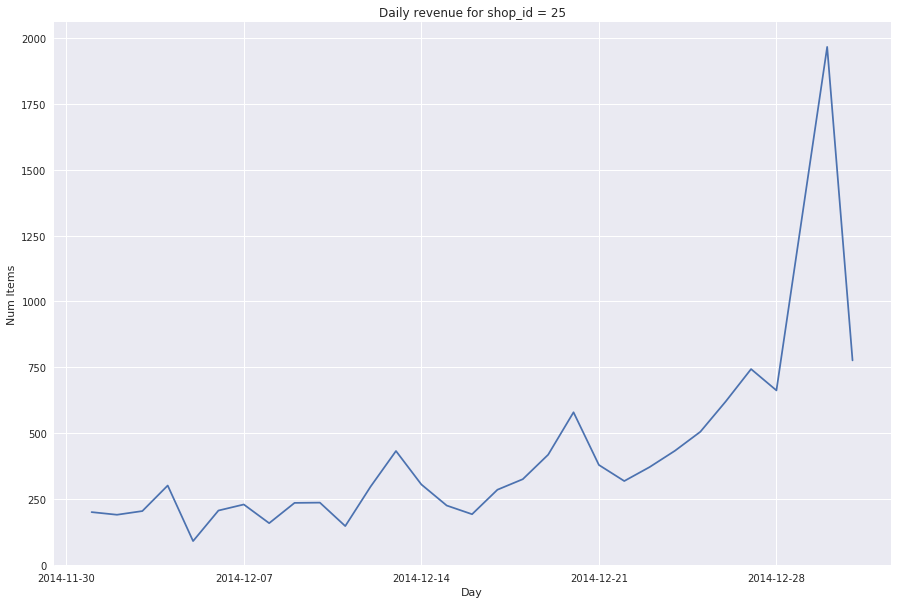

In [194]:
days=total_num_items_sold.index

plt.figure(figsize=(15,10))
plt.plot(days,total_num_items_sold)
plt.ylabel('Num Items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

In [195]:
total_num_items_sold_var=np.var(total_num_items_sold,ddof=1)
total_num_items_sold_var

119526.57586206897